# Import Libraries

In [14]:
# Data Loading
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

def isolate():
    with pd.option_context('display.max_columns', None):
        display(df.head())

isolate()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Define data type
nom_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'PaperlessBilling', 'PaymentMethod']
ord_cols = ['Contract']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Exploratory Data Analysis

## Categorical data

Gender, SeniorCitizen, Partner, Dependents

- Gender is not a good separator of Churn (Male 1:1 vs Female 1:1).
- Senior citizen is more likely to Churn (0 3:1 vs 1 1:1).
- Customer that do not have a partner is more likely to Churn (Yes 4:1 vs No 2:1).
- Customer that do not have dependents are more likely to Churn (No 2:1 vs Yes 5:1).

In [4]:
# Change dtypes so seaborn can know it's a category.
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

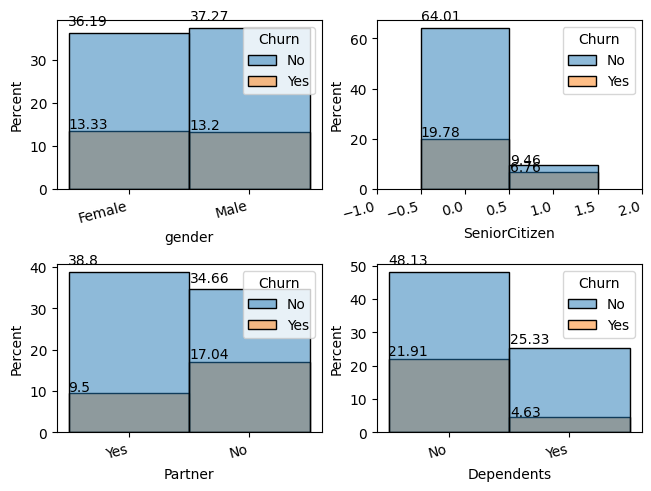

In [5]:
def isolate():
    fig, axes = plt.subplots(2,2, layout="constrained")
    
    for feature, ax in zip(
        ['gender', 'SeniorCitizen', 'Partner', 'Dependents'],
        axes.ravel()
    ):
        # (df.groupby(by='Churn')[feature]
        #    .value_counts() / len(df)).plot.bar(ax=ax)
        sns.histplot(data=df, x=feature, hue='Churn', stat='percent', ax=ax)
        
        # rotate the x-axis labels.
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
        
        # add the value above the bar.
        for p in ax.patches:
            ax.annotate(round(p.get_height(),2), (p.get_x() * 1.01, p.get_height() * 1.05))
    
isolate()

PhoneService, MultipleLines, InternetService, OnlineSecurity

- Customer that has a phone service is more likely to Churn (Yes 2.7:1 vs No 3:1)
- Customer that have a phone service is more likely to Churn (No 3:1 vs Yes 2:1 vs No phone service 3.5:1)
- Customer that use Fiber optic is more likely to Chrun (DSL 4:1 vs Fiber optic 1:1 vs No 10:1)
- Customer tha do not have internet service tends to Churn (No 1:1 vs Yes 6:1 vs No internet service 10:1)

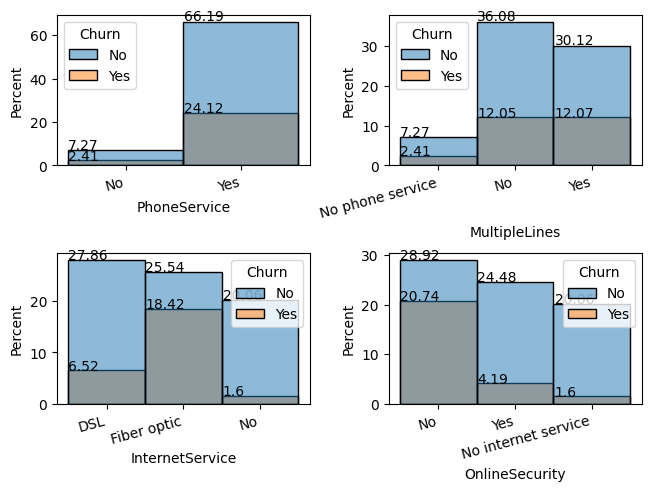

In [6]:
def isolate():
    fig, axes = plt.subplots(2,2, layout="constrained")
    
    for feature, ax in zip(
        ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity'],
        axes.ravel()
    ):
        # (df.groupby(by='Churn')[feature]
        #    .value_counts() / len(df)).plot.bar(ax=ax)
        sns.histplot(data=df, x=feature, hue='Churn', stat='percent', ax=ax)
        
        # rotate the x-axis labels.
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
        
        # add the value above the bar.
        for p in ax.patches:
            ax.annotate(round(p.get_height(),2), (p.get_x() * 1.01, p.get_height() * 1.01))
    
isolate()

- Customer without online backkup is more likely to Churn (Yes 4:1 vs No 1:1 vs No internet Service 10:1)
- Customer without device protection is more likely to Churn (No 1:1 vs Yes 3:1 vs No internet service 10:1)
- Customer without tech support is more likely to Churn (No 1:1 vs Yes 6:1 vs No internet service 10:1)
- StreamingTV is not a good separator of Churn (Yes 2:1 vs No 2:1 vs No internet service 10:1)

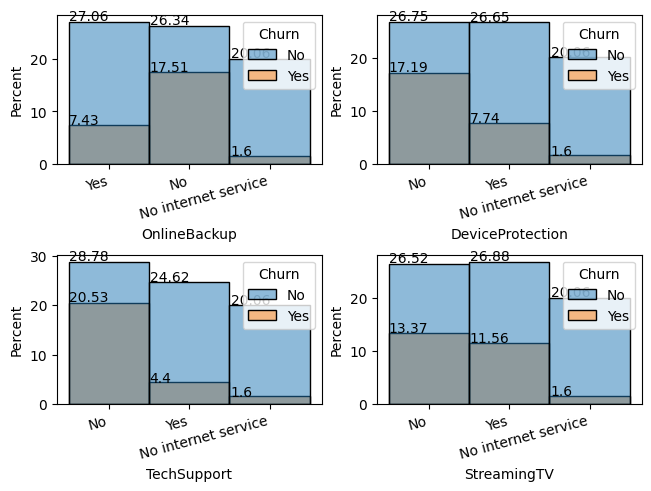

In [7]:
def isolate():
    fig, axes = plt.subplots(2,2, layout="constrained")
    
    for feature, ax in zip(
        ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV'],
        axes.ravel()
    ):
        # (df.groupby(by='Churn')[feature]
        #    .value_counts() / len(df)).plot.bar(ax=ax)
        sns.histplot(data=df, x=feature, hue='Churn', stat='percent', ax=ax)
        
        # rotate the x-axis labels.
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
        
        # add the value above the bar.
        for p in ax.patches:
            ax.annotate(round(p.get_height(),2), (p.get_x() * 1.01, p.get_height() * 1.01))
    
isolate()

- Customer without streaming movies is more likely to Churn (Yes 2.2:1 vs No 2:1 vs No Internet Service 10:1)
- Customer with month-to-month contract is more likely to Churn (Month-to-month 1:1, Two year 23:1, One year 9:1)
- Customer with paperless billing is more likely to Churn (Yes 2:1 vs No 5:1)
- Customer with electronic check is more likely to Churn (Mailed check 5:1, Electronic check 1:1, Credit card (automatic) 6:1, Bank transfer (automatic) 4:1)

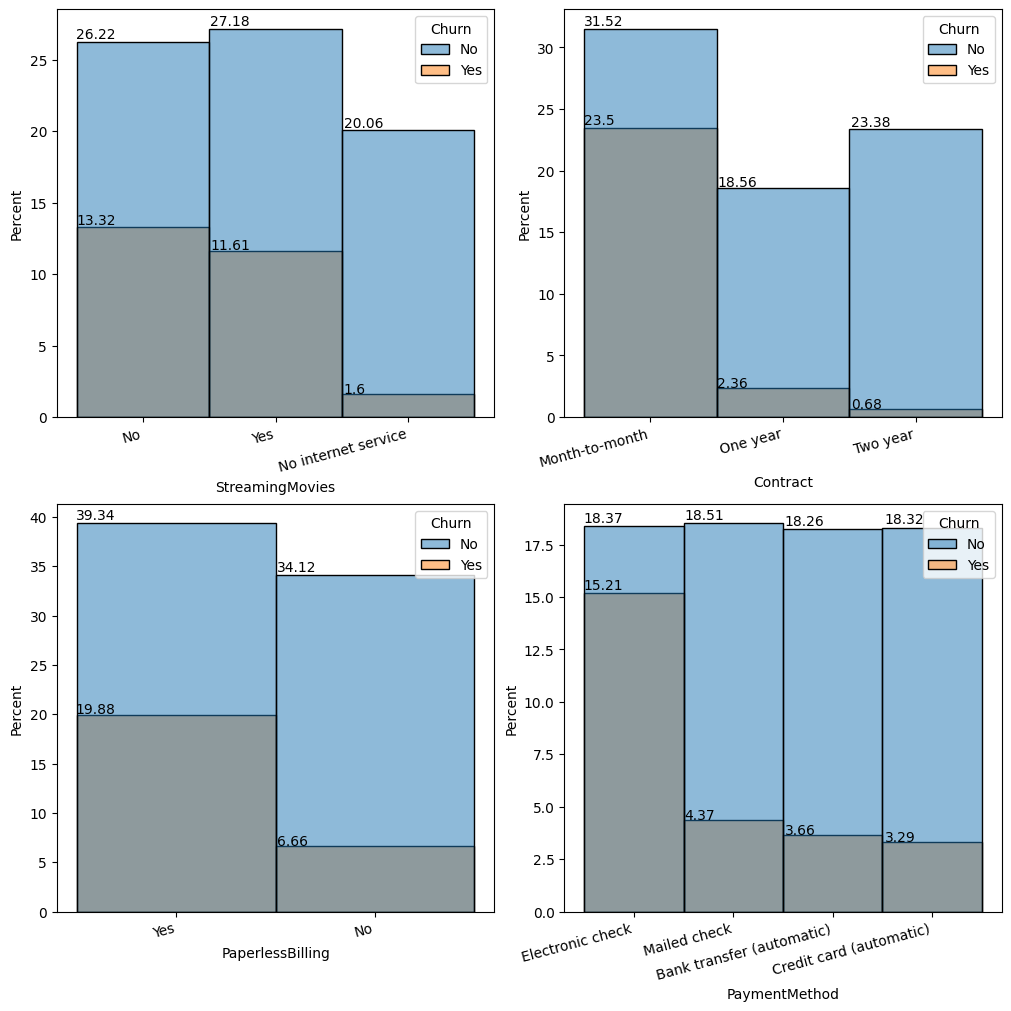

In [8]:
def isolate():
    fig, axes = plt.subplots(2,2, figsize=(10,10), layout="constrained")
    
    for feature, ax in zip(
        ['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
        axes.ravel()
    ):
        # (df.groupby(by='Churn')[feature]
        #    .value_counts() / len(df)).plot.bar(ax=ax)
        sns.histplot(data=df, x=feature, hue='Churn', stat='percent', ax=ax)
        
        # rotate the x-axis labels.
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='right')
        
        # add the value above the bar.
        for p in ax.patches:
            ax.annotate(round(p.get_height(),2), (p.get_x() * 1.01, p.get_height() * 1.01))
    
isolate()

## Numerical data

tenure, MonthlyCharges, TotalCharges

In [9]:
# TotalCharges with ' ' always have tenure 0
df.loc[df['TotalCharges'] == ' ', 'tenure']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

In [10]:
# tenure 0 always have TotalCharges ' '
df.loc[df['tenure'] == 0, 'TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [11]:
# TotalCharges have ' ' value, we will replace it to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

- New customer (tenure below 40) is 33% likely to Churn.
- Customer with montly charges above 70 and below 100 is 50% likely to Churn.
- Customer with monthly charges below 60 and above 55 is less likely to Churn.
- Customer with monthly charges below 30 is less likely to Churn.
- Customer with total charges below 1000 is more likely to Churn.
- Customer with total charges above 1000 and below 3500 is less likely to Churn.
- Customer with total charges above 3500 is less likely to Churn.

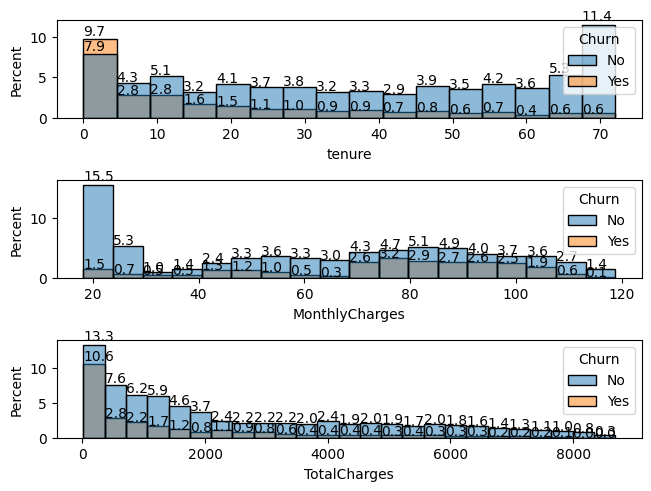

In [12]:
def isolate():
    fig, axes = plt.subplots(3,1, layout="constrained")
    for feature, ax in zip(['tenure', 'MonthlyCharges', 'TotalCharges'], axes.ravel()):
        
        sns.histplot(data=df, x=feature, hue='Churn', stat='percent', ax=ax)
        
        for p in ax.patches:
            ax.annotate(round(p.get_height(),1), (p.get_x(), p.get_height() * 1.05))
    
isolate()

- No outliers based on IQR.

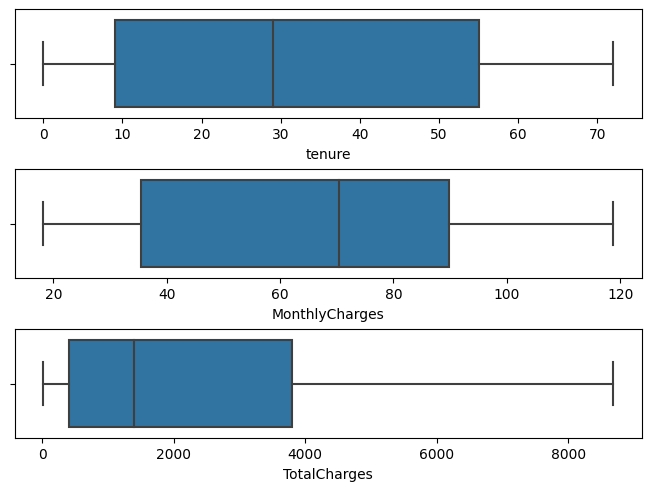

In [20]:
# Check outliers
def isolate():
    fig, axes = plt.subplots(3,1, layout="constrained")
    
    for feature, ax in zip(num_cols, axes.ravel()):
        sns.boxplot(data=df, x=feature, ax=ax)
    
isolate()

- Square Root Transformation can normalize a skewed distribution.

In [17]:
# Check skewness and solution
def isolate():
    display(df[num_cols].skew())
    
    display(np.log1p(df[['TotalCharges']]).skew())
    
    display(np.sqrt(df[['TotalCharges']]).skew())
    
isolate()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

TotalCharges   -0.743089
dtype: float64

TotalCharges    0.308926
dtype: float64